In [1]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from environment import SmartBrokerEnv
from agents.a2c import A2C
from networks.a2c.actor import Actor
from networks.a2c.critic import Critic

import gym
import matplotlib.pyplot as plt
import torch

norm_cols = ['Volume XRP']
cols = ['date'] + ['open', 'high', 'low', 'close', f'Volume XRP']
batch_dur = 15
env = SmartBrokerEnv(
    batch_dur=batch_dur,
    df_info={
        'start_date': '2021-01-01',
        'end_date': '2021-02-01',
        'norm_cols': norm_cols,
        'cols': cols,
    },
    portfolio={

    },
)

actor_model = Actor(
    state_dim=batch_dur*3+3,
    action_dim=3,
)
critic_model = Critic(state_dim=batch_dur*3+3)
a2c = A2C(
    env=env, 
    actor=actor_model,
    critic=critic_model,
    n_actns=3,
    actor_optmz=torch.optim.Adam(actor_model.parameters(), lr=0.001),
    critic_optmz=torch.optim.Adam(critic_model.parameters(), lr=0.001),
    hyprprms={
        'gamma': 0.9995,
    },
    log_freq=1,
    mdl_pth='../models/a2c_nn',
)

In [2]:
a2c.run(1000)


Ep: 0 | TS: 19970 | L: 0.796 | R: -32.2 | P: 8.47 | R.Avg P: 8.47 | NW: 108.47 | R.Avg NW: 108.47 | R.U: 201
Ep: 1 | TS: 39940 | L: 0.898 | R: 5.84 | P: 58.82 | R.Avg P: 33.65 | NW: 158.82 | R.Avg NW: 133.64 | R.U: 291
Ep: 2 | TS: 59910 | L: 0.889 | R: -6.63 | P: 28.35 | R.Avg P: 31.88 | NW: 128.35 | R.Avg NW: 131.88 | R.U: 306
Ep: 3 | TS: 79880 | L: 1.166 | R: -16.88 | P: 6.62 | R.Avg P: 25.57 | NW: 106.62 | R.Avg NW: 125.56 | R.U: 305
Ep: 4 | TS: 99850 | L: 1.338 | R: -13.21 | P: 6.85 | R.Avg P: 21.82 | NW: 106.85 | R.Avg NW: 121.82 | R.U: 306
Ep: 5 | TS: 119820 | L: 1.324 | R: -1.15 | P: 19.49 | R.Avg P: 21.43 | NW: 119.49 | R.Avg NW: 121.43 | R.U: 315
Ep: 6 | TS: 139790 | L: 1.236 | R: -5.75 | P: 17.51 | R.Avg P: 20.87 | NW: 117.51 | R.Avg NW: 120.87 | R.U: 319
Ep: 7 | TS: 159760 | L: 1.109 | R: -0.29 | P: 22.09 | R.Avg P: 21.02 | NW: 122.09 | R.Avg NW: 121.02 | R.U: 325
Ep: 8 | TS: 179730 | L: 1.028 | R: -3.55 | P: 19.57 | R.Avg P: 20.86 | NW: 119.57 | R.Avg NW: 120.86 | R.U: 328

KeyboardInterrupt: 

/Users/vinay/miniforge3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/vinay/miniforge3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


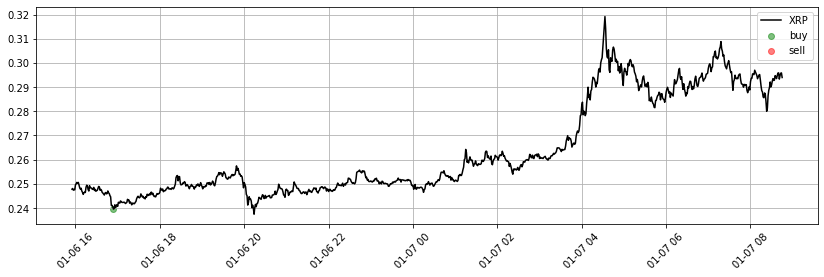

Max.Rewards: -100.0 | Avg.Profit: 9.73 | Avg.Units: 394 | Avg.Bal: 5.49


In [56]:
a2c.evaluate(start_dt='2021-01-06 16:00', duration=1000)

## Visualizations

### Training 

Text(0.5, 1.0, 'Rolling avg balance per episode')

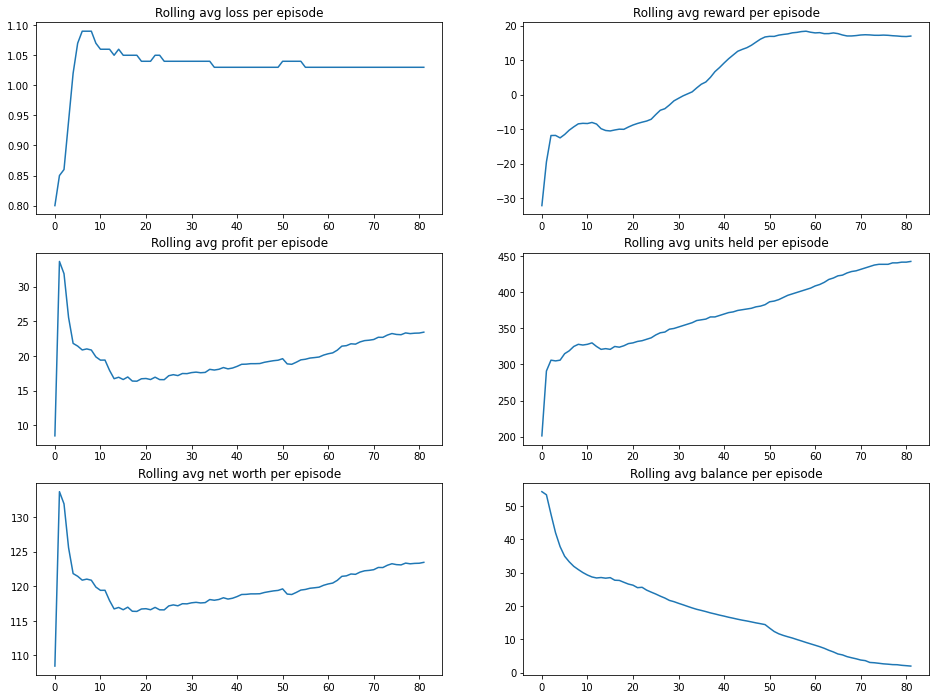

In [11]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
r_avg_rewards = []
r_avg_profits = []
r_avg_bal = []
r_avg_units_held = []
r_avg_loss = []
r_avg_net_worth = []
count = 0

for _, log in a2c.logs.items():
    r_avg_rewards.append(log['r_avg_reward'])
    r_avg_profits.append(log['r_avg_profit'])
    r_avg_bal.append(log['r_avg_bal'])
    r_avg_units_held.append(log['r_avg_units_held'])
    r_avg_loss.append(log['r_avg_loss'])
    r_avg_net_worth.append(log['r_avg_net_worth'])
    count += 1

ax[0][0].plot(range(count), r_avg_loss)
ax[0][0].set_title('Rolling avg loss per episode')

ax[0][1].plot(range(count), r_avg_rewards)
ax[0][1].set_title('Rolling avg reward per episode')

ax[1][0].plot(range(count), r_avg_profits)
ax[1][0].set_title('Rolling avg profit per episode')

ax[1][1].plot(range(count), r_avg_units_held)
ax[1][1].set_title('Rolling avg units held per episode')

ax[2][0].plot(range(count), r_avg_net_worth)
ax[2][0].set_title('Rolling avg net worth per episode')

ax[2][1].plot(range(count), r_avg_bal)
ax[2][1].set_title('Rolling avg balance per episode')

In [14]:
# torch.save(a2c.actor.state_dict(), '../models/a2c_nn/actor')
# torch.save(a2c.critic.state_dict(), '../models/a2c_nn/critic')

In [13]:
# import pickle
# with open("../pickles/a2c_logs_main.pickle","wb") as f:
#     temp = dict(a2c.logs)
#     pickle.dump(temp, f, pickle.HIGHEST_PROTOCOL)